In [1]:
from ResearchMain import *

In [2]:
_ = all_df[[i for i in all_df.columns if
            isinstance(i, str) and i.startswith('S')]].replace(0, 0.00001)
sediment_df = _.drop(['S-Size-d((0.9-0.1)/0.5)', 'S-pH'], axis=1)

water_df = all_df[[i for i in all_df.columns if
                   isinstance(i, str) and i.startswith('W')]].replace(0, 0.00001)

In [8]:
sediment_df

,S-TN,S-TP,S-Size-d(0.1),S-Size-d(0.5),S-Size-d(0.9)
D-N1,705,806.285714,11.777,38.340,257.008
D-N2,320,794.285714,45.008,807.765,1239.506
D-N3,420,791.000000,611.957,875.213,1252.883
D-N4,650,768.000000,20.270,53.408,181.770
D-N5,1475,797.714286,9.567,40.619,116.947
...,...,...,...,...,...
W-H8,5325,956.571429,13.179,54.533,177.715
W-H9,5655,924.000000,12.406,46.868,175.772
W-H10,4060,901.142857,12.816,45.730,169.597
W-H11,4060,998.285714,13.281,56.314,187.891


In [4]:
#PCA分析
water_pca = calc_pca(water_df)
sediment_pca = calc_pca(sediment_df)
plot_data = [water_pca, sediment_pca]

In [9]:
sediment_pca

,PCA 0,PCA 1,River,Period
D-N1,0.186270,-0.972115,Nanfei River,Dry Season
D-N2,6.500814,0.103155,Nanfei River,Dry Season
D-N3,11.421042,1.012195,Nanfei River,Dry Season
D-N4,0.156531,-1.207756,Nanfei River,Dry Season
D-N5,-0.221916,-0.931803,Nanfei River,Dry Season
...,...,...,...,...
W-H8,-0.300589,0.797144,Hangbu River,Wet Season
W-H9,-0.346982,0.677530,Hangbu River,Wet Season
W-H10,-0.254949,0.214850,Hangbu River,Wet Season
W-H11,-0.214396,0.770103,Hangbu River,Wet Season


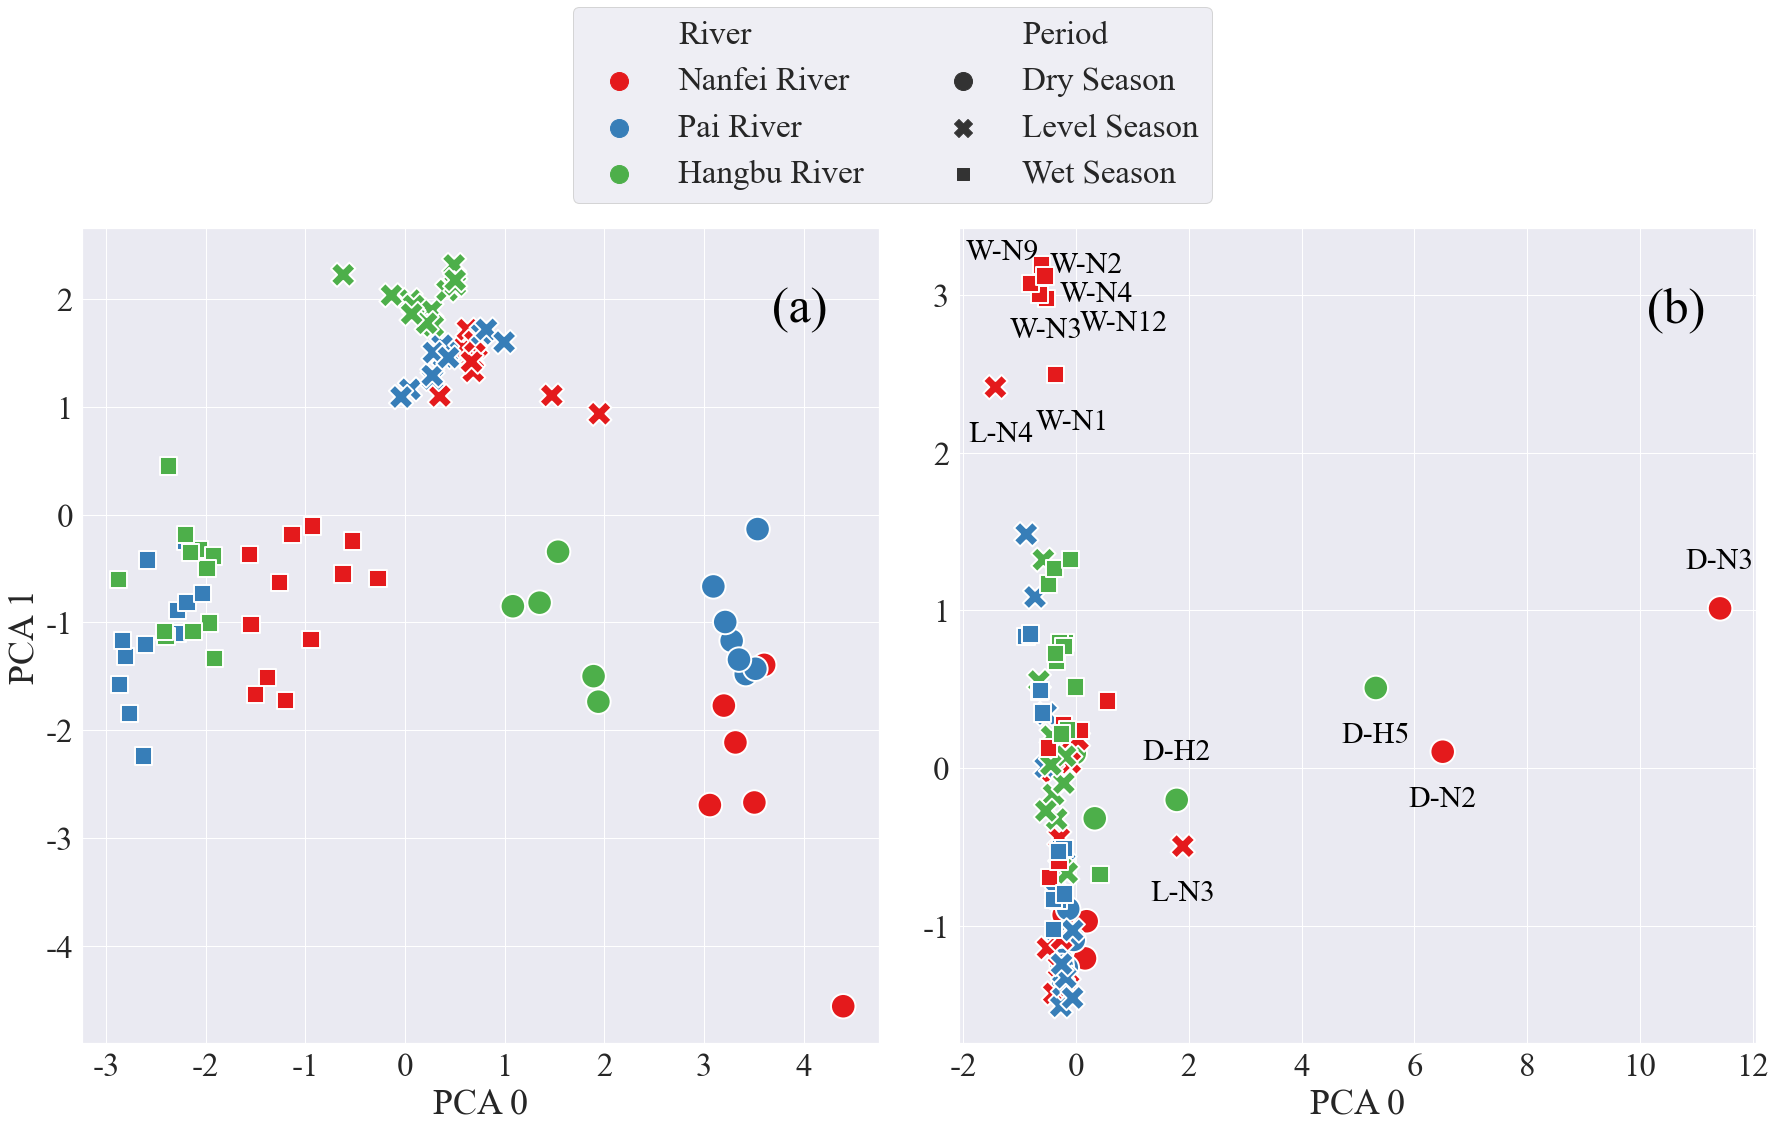

In [57]:
# 可视化
sns.set(
    style='darkgrid',
    font='Times New Roman',
    font_scale=3
)
fig, ax_arr = plt.subplots(1, 2, figsize=(30, 15))
fig.subplots_adjust(wspace=0.1)  # 设置子图的横纵间距

# 要进行标记的特殊点
spot_name = {
    'D-N3': [0, .3],
    'D-N2': [0, -0.3],
    'D-H5': [0, -0.3],
    'L-N3': [0, -0.3],
    'D-H2': [0, 0.3],
    'L-N4': [0.1, -0.3],
    'W-N1': [0.3, -0.3],
    'W-N2': [0.8, 0],
    'W-N3': [0, -.2],
    'W-N4': [1, 0],
    'W-N9': [-.5, .2],
    'W-N12': [1.4, -.3]
}

for index, cur_df in enumerate(plot_data):
    cur_ax = ax_arr[index]
    sns.scatterplot(
        data=cur_df,
        x='PCA 0',
        y='PCA 1',
        hue='River',
        style='Period',
        s=600,
        palette="Set1",  # 颜色版
        ax=cur_ax
    )
    # 删除子图的图例
    cur_ax.get_legend().remove()
    # 添加编号
    cur_ax.text(
        0.9,
        0.9,
        f'({CHAR[index]})',
        fontdict={'size': '50', 'color': 'white'},
        transform=cur_ax.transAxes,
        color='black',
        ha='center', va='center'
    )

    if index == 1:
        cur_ax.set_ylabel(None)

        # 特殊点标记
        for name, coor in spot_name.items():
            # 计算坐标：原始位置+偏移
            x, y = sediment_pca.loc[name, 'PCA 0'] + coor[0], sediment_pca.loc[name, 'PCA 1'] + coor[1]

            cur_ax.text(
                x,
                y,
                name,
                fontdict={'size': '30', 'color': 'white'},
                color='black',
                ha='center', va='center'
            )

lines, labels = fig.axes[-1].get_legend_handles_labels()  # 获取最后一个子图的图例
fig.legend(
    lines,
    labels,
    ncol=2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    markerscale=3,  # 图例中图标的调整
    # prop={'family':'SimHei','size':4}  # 图例中文字的调整
)

# 保存图片
fig.savefig(EXPORT_PATH + '环境因子PCA图' + IMG_TYPE, dpi=DPI, bbox_inches='tight')